In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

In [2]:
train_dir = "E://PDuCV//chest_xray//train"
test_dir = "E://PDuCV//chest_xray//test"
val_dir = "E://PDuCV//chest_xray//val"

In [3]:
data_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2, 
                             zoom_range = 0.15,
                             rotation_range = 7,
                             width_shift_range=0.15,  
                             height_shift_range=0.1,  
                             horizontal_flip=True)

train_gen = data_gen.flow_from_directory(train_dir,
                                           target_size = (300, 300),
                                           batch_size = 32,
                                           shuffle = True,
                                           color_mode = 'grayscale',
                                            class_mode = 'binary')

val_test_gen = ImageDataGenerator(rescale = 1./255)

val_gen = val_test_gen.flow_from_directory(val_dir,
                                      target_size = (300, 300),
                                      batch_size = 32,
                                      shuffle = False,
                                      color_mode = 'grayscale',
                                      class_mode = 'binary')

test_gen = val_test_gen.flow_from_directory(test_dir,
                                      target_size = (300, 300),
                                      batch_size = 32,
                                      shuffle = False,
                                      color_mode = 'grayscale',
                                      class_mode = 'binary')

Found 4016 images belonging to 2 classes.
Found 1016 images belonging to 2 classes.
Found 824 images belonging to 2 classes.


In [4]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu', input_shape=(300, 300, 1)))
model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(lr=0.0001, decay=1e-5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 8)       400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 8)       3144      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 16)      3216      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 16)      6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 32)        4

In [6]:
stop = EarlyStopping(patience = 5, monitor = 'val_loss')

In [7]:
model.fit(x = train_gen, validation_data = val_gen, epochs = 100, shuffle = False, callbacks=[stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 126 steps, validate for 32 steps
Epoch 1/100
126/126 [==============================] - 99s 783ms/step - loss: 0.6145 - accuracy: 0.7159 - val_loss: 0.5059 - val_accuracy: 0.7953
Epoch 2/100
126/126 [==============================] - 93s 738ms/step - loss: 0.4316 - accuracy: 0.7898 - val_loss: 0.3127 - val_accuracy: 0.8524
Epoch 3/100
126/126 [==============================] - 101s 798ms/step - loss: 0.2824 - accuracy: 0.8812 - val_loss: 0.2598 - val_accuracy: 0.8789
Epoch 4/100
126/126 [==============================] - 106s 839ms/step - loss: 0.2390 - accuracy: 0.9044 - val_loss: 0.2377 - val_accuracy: 0.8927
Epoch 5/100
126/126 [==============================] - 93s 737ms/step - loss: 0.2278 - accuracy: 0.9059 - val_loss: 0.1819 - val_accuracy: 0.9291
Epoch 6/100
126/126 [==============================] - 92s 729ms/step - loss: 0.2113 - accuracy: 0.9196 - val_loss: 0.2088 - val_accuracy: 0.9222
Epoch 7/100
126/126 [========

In [8]:
history = pd.DataFrame(model.history.history)

<AxesSubplot:>

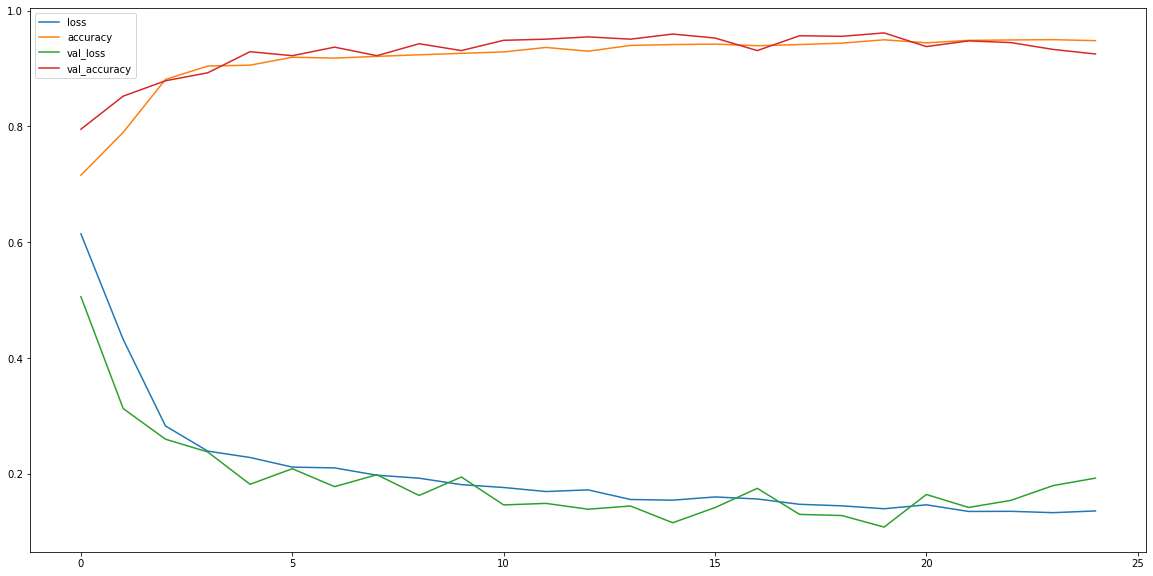

In [9]:
plt.rcParams["figure.figsize"] = (20,10)
history.plot()

In [10]:
print("Testing accuracy : ",model.evaluate(test_gen)[1]*100)

  ...
    to  
  ['...']
26/26 [==============================] - 11s 405ms/step - loss: 0.2780 - accuracy: 0.8968
Testing accuracy :  89.68446850776672


In [11]:
predictions_test = (model.predict(test_gen,verbose=True) > 0.5).astype("int32")

26/26 [==============================] - 8s 323ms/step


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       234
           1       0.92      0.94      0.93       590

    accuracy                           0.90       824
   macro avg       0.88      0.86      0.87       824
weighted avg       0.90      0.90      0.90       824



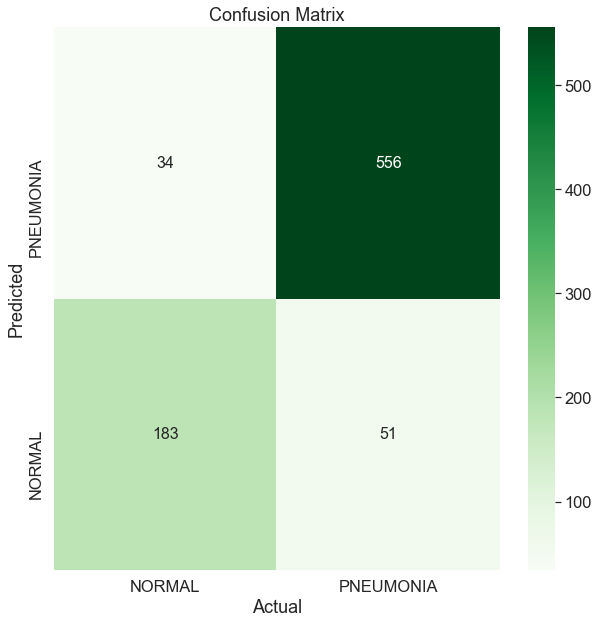

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = np.array([0] * 234 + [1] * 590) #234 Normal, #590 Pneumonia
data = confusion_matrix(y_true, predictions_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_cm,cmap = 'Greens', annot=True,fmt = '.5g',annot_kws={"size": 16})# font size
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']); ax.yaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']);
ax.set_ylim([0,2])

print("Classification Report: ")
print(classification_report(y_true,predictions_test))

In [13]:
model.save('second_model.h5')